In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2



In [2]:
original_image = cv2.imread('original_final.png')
masked_image = cv2.imread('mask_final.png')

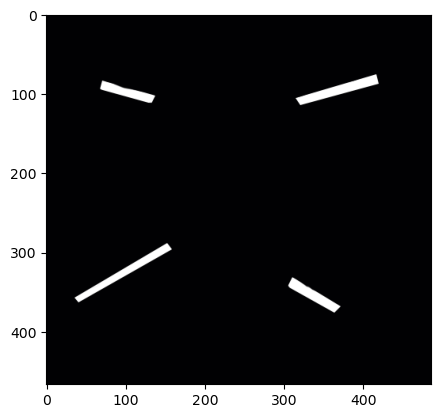

In [3]:
plt.imshow(masked_image)

In [4]:
original_image.shape,masked_image.shape

((467, 486, 3), (467, 486, 3))

In [5]:
original_gray = cv2.cvtColor(original_image,cv2.COLOR_BGR2GRAY)
masked_gray = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)

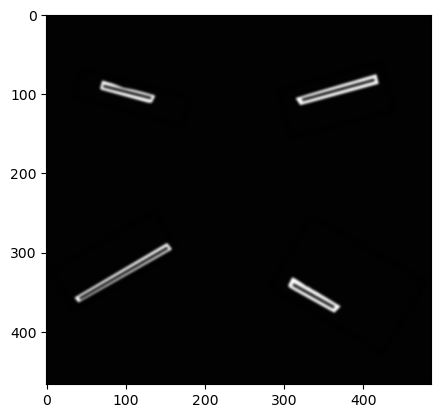

In [6]:
result = cv2.bitwise_and(original_gray,masked_gray)
kernel = 7
result = cv2.GaussianBlur(result,(kernel, kernel),0)
plt.imshow(result,cmap = 'gray')

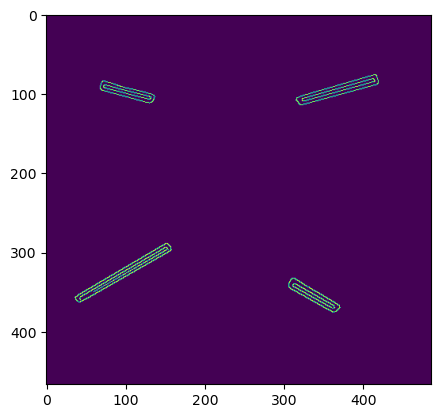

In [7]:
edges = cv2.Canny(result,100,250)
plt.imshow(edges)

In [8]:
linesP = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, None, 50, 10)



In [9]:
def compare_dis(source):
    ids = []
    for i in range(14):
        if (np.abs(source - linesP[i]).mean()) < 20:
            ids.append(i)
    
    return ids

In [11]:
arr = []
for i in range(14):  
    arr.append(compare_dis(linesP[i]))

uniques_lines = [0,4,5,12]

In [12]:


def calc_length(point_arr):
    arr = np.array(point_arr)
    return np.abs(arr[0]-arr[2]) + np.abs(arr[1] - arr[3])


distance = []
for i in uniques_lines:
    distance.append(calc_length(linesP[i][0]))
    
distance

[181, 89, 122, 78]

In [13]:

def return_max_index(arr):
    largest = arr[0]
    idx = 0
    for i in range(4):
        if largest < arr[i]:
            largest = arr[i]
            idx = i
    return idx
        
                
print(distance)
original_image = cv2.imread('original_final.png')

# to put a number below the rectangle
for i in range(4):
    max_id = return_max_index(distance)
    distance[max_id] = 0
    line = uniques_lines[max_id]
    txt = 4 - max_id
    cv2.putText(original_image,str(txt),(linesP[line][0][0],linesP[line][0][1] + 70),
               cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2, cv2.LINE_AA )

[181, 89, 122, 78]


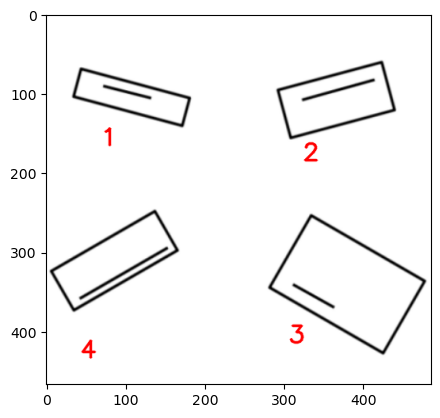

In [14]:
plt.imshow(original_image)